# Kaggle Bike Sharing Demand
[http://www.kaggle.com/c/bike-sharing-demand](http://www.kaggle.com/c/bike-sharing-demand)

- Bike_Sharing_Demand.csv (10,886 * 12)
   - <font color = 'blue'>datetime : Date + Timestamp</font>
   - season : 1(봄), 2(여름), 3(가을), 4(겨울)
   - holiday : 0(휴일이 아닌 날), 1(토요일, 일요일을 제외한 공휴일)
   - workingday : 0(주말 및 휴일), 1(토요일, 일요일 및 휴일이 아닌 주중)
   - weather : 1(맑음, 약간흐림), 2(안개, 흐림), 3(가벼운 눈/비 + 천둥), 4(심한 눈/비, 천둥/ 번개)
   - temp : 온도(섭씨)
   - atemp : 체감온도(섭씨)
   - humidity : 습도
   - windspeed : 풍속
   - casual : 사전 등록되지 않은 사용자 대여 횟수
   - registered : 사전 등록된 사용자 대여 횟수
   - <font color = 'red'>count : 총 대여 횟수 -> 'y'

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Data Load
* 'Bike_Sharing_Demand.csv' from Github

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Bike_Sharing_Demand.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [3]:
DF.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


# II. Data Preprocessing

> ## 1) 'object' -> 'datetime64'

In [4]:
DF['datetime'] = pd.to_datetime(DF['datetime'])

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


> ## 2) 'year', 'month', 'day', 'hour', 'weekday' 추출

In [6]:
DF['year'] = DF['datetime'].dt.year
DF['month'] = DF['datetime'].dt.month
DF['day'] = DF['datetime'].dt.day
DF['hour'] = DF['datetime'].dt.hour
DF['weekday'] = DF['datetime'].dt.weekday

In [ ]:
DF.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5


> ## 3) Drop Columns

- 'datetime'

In [7]:
DF.drop(columns = 'datetime', axis = 1, inplace = True)

In [8]:
DF.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5


> ## 4) 분석용 DataFrame 백업

In [9]:
DF0 = DF.copy()

DF0.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5


> ## 5) 시각화 레이블 변환

In [10]:
DF['season'] = DF['season'].map({1: 'Spring',
                                 2: 'Summer',
                                 3: 'Fall',
                                 4: 'Winter'})

DF['weather'] = DF['weather'].map({1: 'Clear',
                                   2: 'Mist, Few clouds',
                                   3: 'Light Snow, Rain, Thunder',
                                   4: 'Heavy Snow, Rain, Thunder'})

DF['holiday'] = DF['holiday'].map({0: 'WorkingDay',
                                   1: 'Holiday'})

DF['workingday'] = DF['workingday'].map({0: 'Holiday',
                                         1: 'WorkingDay'})

DF['weekday'] = DF['weekday'].map({0: 'Monday',
                                   1: 'Tuesday',
                                   2: 'Wednesday',
                                   3: 'Thursday',
                                   4: 'Friday',
                                   5: 'Saturday',
                                   6: 'Sunday'})

In [11]:
DF.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,Spring,WorkingDay,Holiday,Clear,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,Spring,WorkingDay,Holiday,Clear,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,Spring,WorkingDay,Holiday,Clear,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday


# III. 탐색적데이터분석(EDA)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> ## 1) 전체 'count' 분포

* height, Width = aspect * height

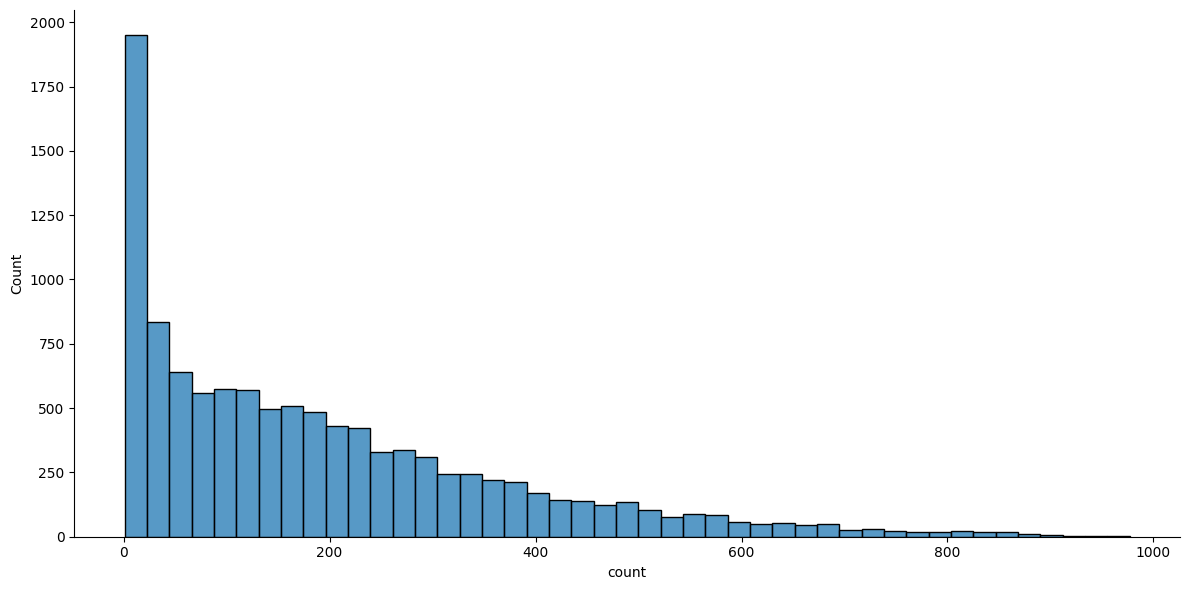

In [13]:
sns.displot(DF['count'], height = 6, aspect = 2)
plt.show()

* 'count' 평균

In [14]:
DF['count'].mean()

191.57413191254824

> ## 2) 'year' - 연도별 평균 대여수

* groupby( ) 적용

In [15]:
DF.groupby(['year'])['count'].mean()

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64

* 막대 그래프

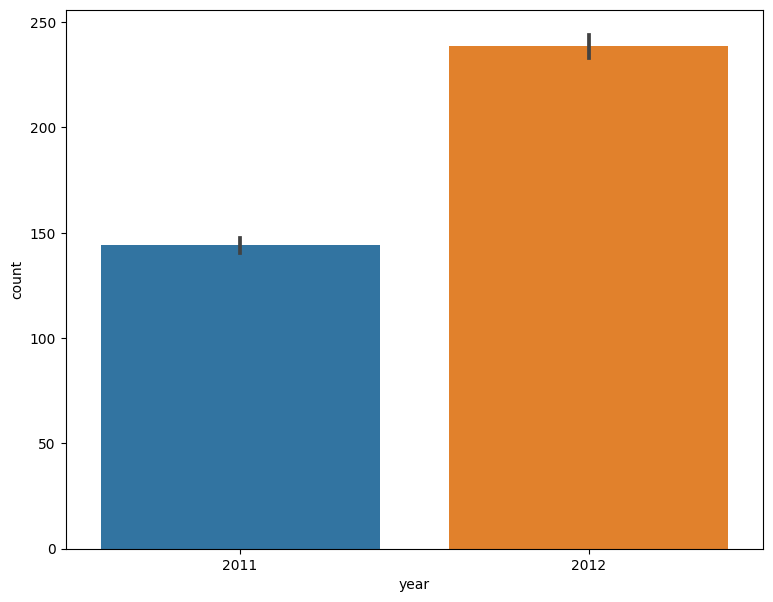

In [16]:
plt.figure(figsize = (9, 7))
sns.barplot(x = 'year',
            y = 'count',
            data = DF);

> ## 3) 'month' - 월별 평균 대여횟수

* groupby( ) 적용

In [17]:
DF.groupby(['month'])['count'].mean()

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

* 막대 그래프

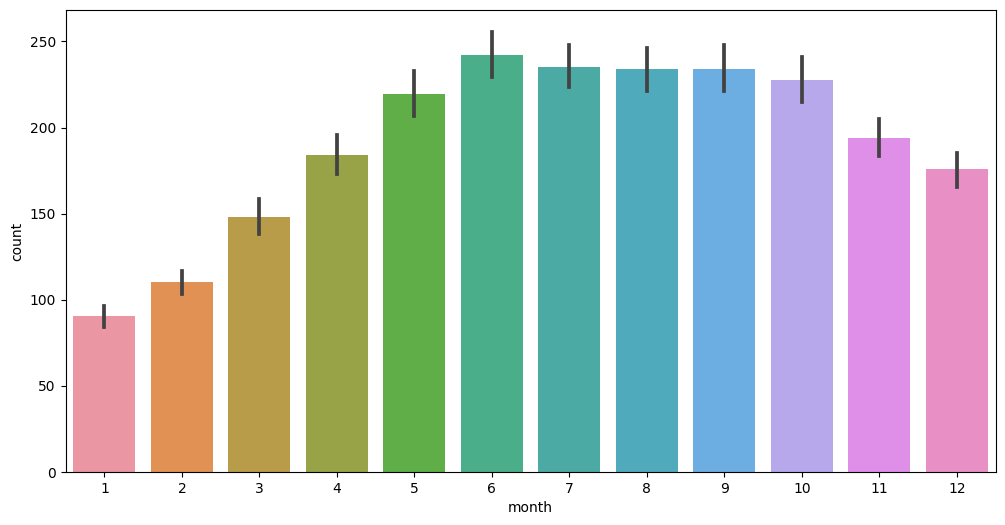

In [18]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'month',
            y = 'count',
            data = DF)
plt.show()

* 선 그래프

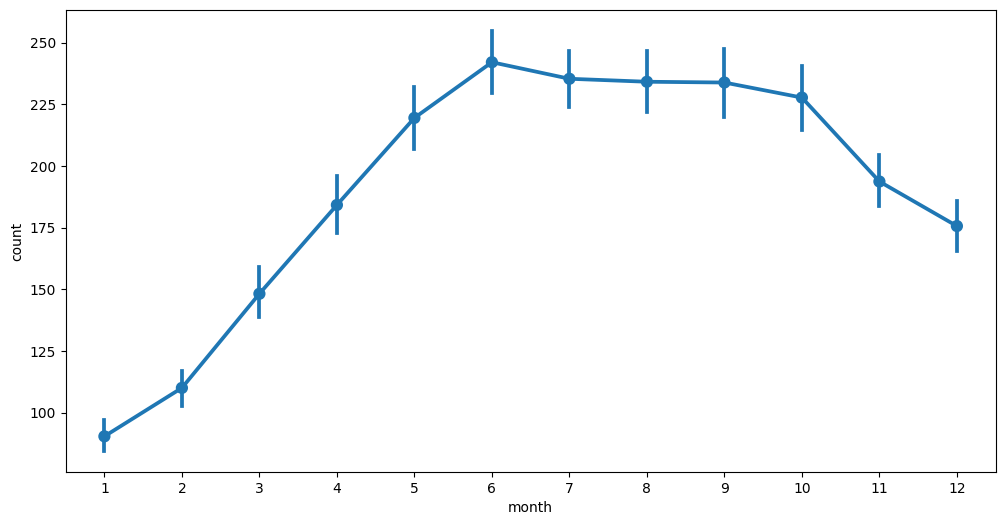

In [19]:
plt.figure(figsize = (12, 6))
sns.pointplot(x = 'month',
              y = 'count',
              data = DF)
plt.show()

* groupby( ) 적용

In [20]:
DF.groupby(['month'])['count'].count()

month
1     884
2     901
3     901
4     909
5     912
6     912
7     912
8     912
9     909
10    911
11    911
12    912
Name: count, dtype: int64

* 상자 그래프

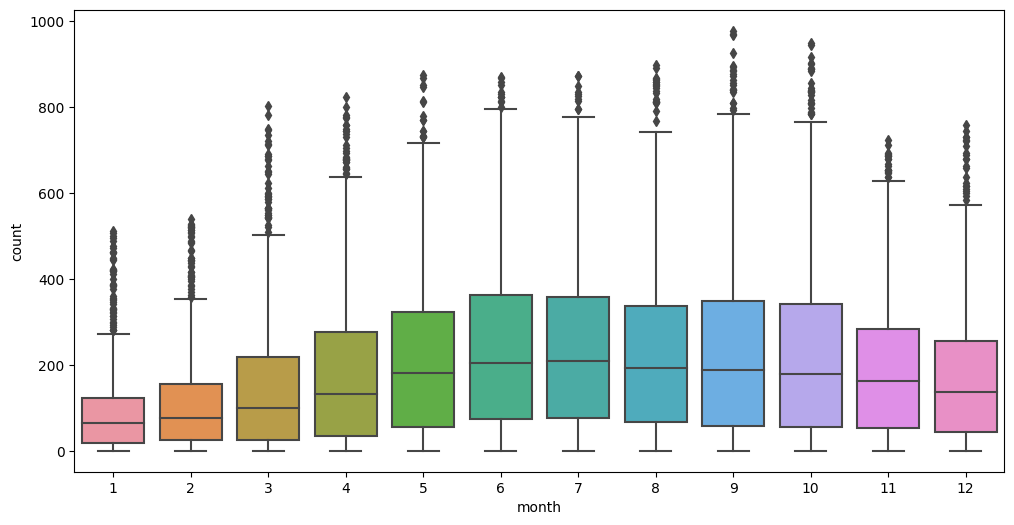

In [21]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'month',
            y = 'count',
            data = DF)
plt.show()

> ## 4) 'atemp' - 평균 체감온도

* groupby( ) 적용

In [22]:
DF.groupby(['month'])['atemp'].mean()

month
1     12.077579
2     14.532608
3     19.017220
4     22.305891
5     26.632374
6     30.988750
7     34.900395
8     33.122001
9     29.590248
10    24.739682
11    18.326054
12    17.117220
Name: atemp, dtype: float64

* 월별 체감온도

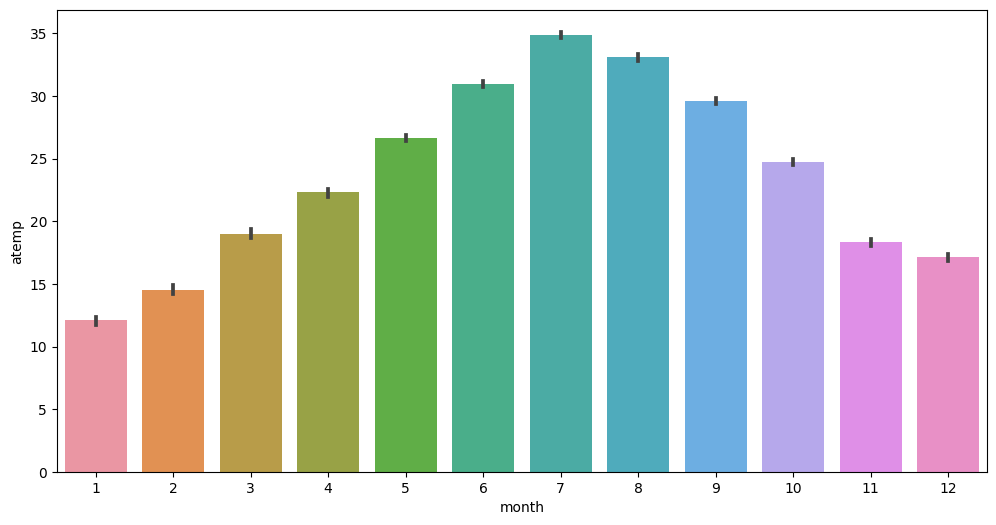

In [23]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'month',
            y = 'atemp',
            data = DF)
plt.show()

* 체감온도 vs. 대여수

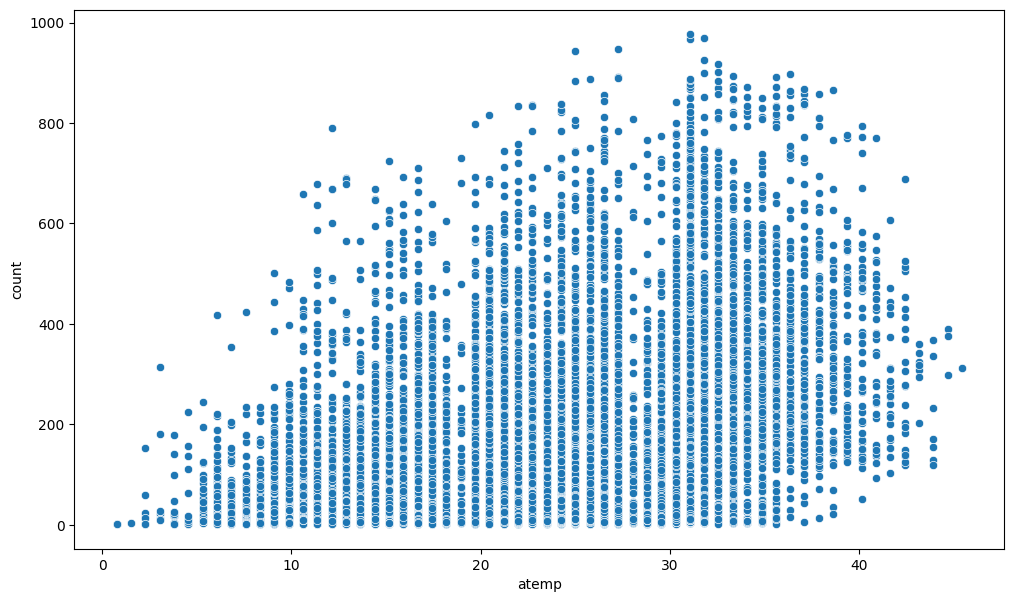

In [24]:
plt.figure(figsize = (12, 7))
sns.scatterplot(x = 'atemp',
                y = 'count',
                data = DF)
plt.show()

> ## 5) 'season' - 계절별 평균 대여횟수

* 'season': 1(봄), 2(여름), 3(가을), 4(겨울)

* groupby( ) 적용

In [25]:
DF.groupby(['season'])['count'].mean()

season
Fall      234.417124
Spring    116.343261
Summer    215.251372
Winter    198.988296
Name: count, dtype: float64

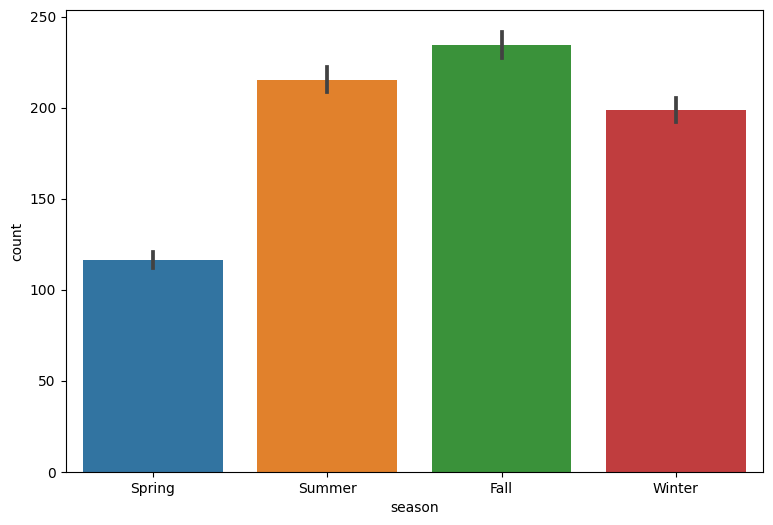

In [26]:
plt.figure(figsize = (9, 6))
sns.barplot(x = 'season',
            y = 'count',
            data = DF)
plt.show()

> ## 6) 'weather' - 날씨별 빈도수

* 'weather': 1(맑음, 약간흐림), 2(안개, 흐림), 3(가벼운 눈/비 + 천둥), 4(심한 눈/비, 천둥/ 번개)

* 막대 그래프

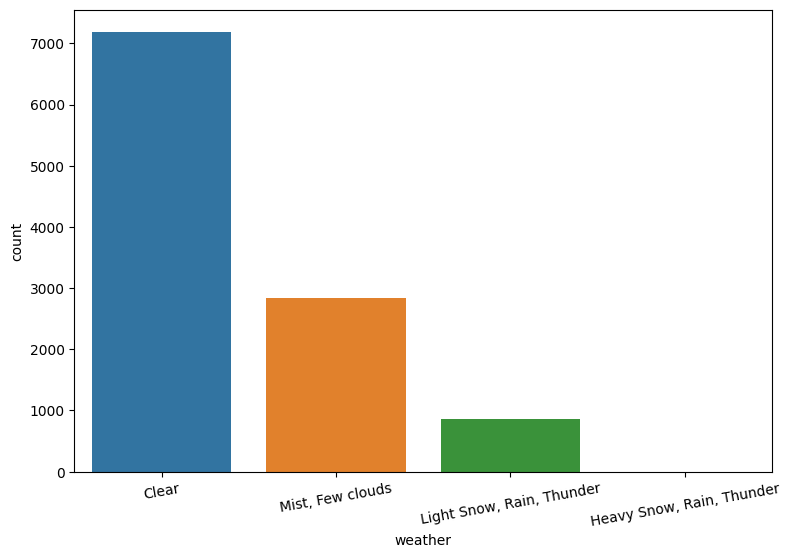

In [27]:
plt.figure(figsize = (9, 6))
plt.xticks(rotation = 10)
sns.countplot(x = 'weather',
              data = DF)
plt.show()

* stripplot으로 '4' 확인

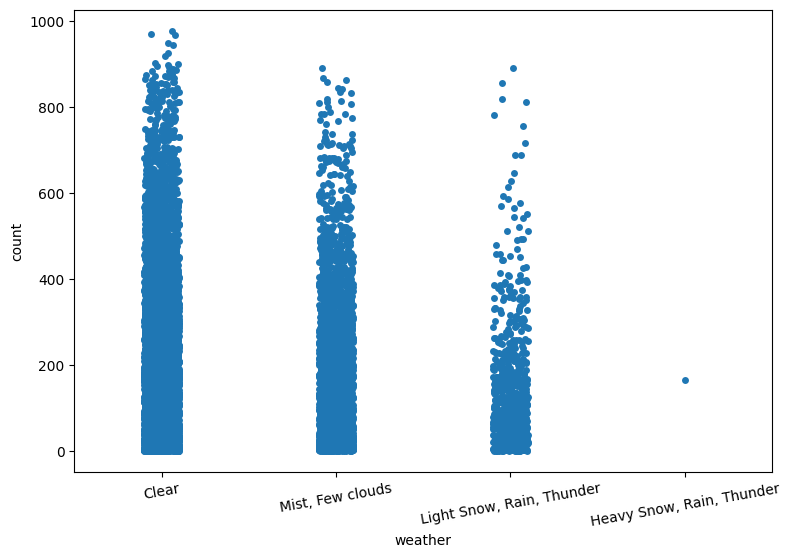

In [28]:
plt.figure(figsize = (9, 6))
plt.xticks(rotation = 10)
sns.stripplot(x = 'weather',
              y = 'count',
              data = DF)
plt.show()

* '4' 정보 확인

In [29]:
DF['weather'].value_counts()

Clear                        7192
Mist, Few clouds             2834
Light Snow, Rain, Thunder     859
Heavy Snow, Rain, Thunder       1
Name: weather, dtype: int64

In [30]:
DF.loc[(DF['weather'] == 'Heavy Snow, Rain, Thunder')]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
5631,Spring,WorkingDay,WorkingDay,"Heavy Snow, Rain, Thunder",8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,Monday


* groupby( ) 적용

In [31]:
DF.groupby(['weather'])['count'].sum()

weather
Clear                        1476063
Heavy Snow, Rain, Thunder        164
Light Snow, Rain, Thunder     102089
Mist, Few clouds              507160
Name: count, dtype: int64

> ## 7) 'hour' - 시간별 평균 대여횟수

* groupby( ) 적용

In [32]:
DF.groupby(['hour'])['count'].mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64

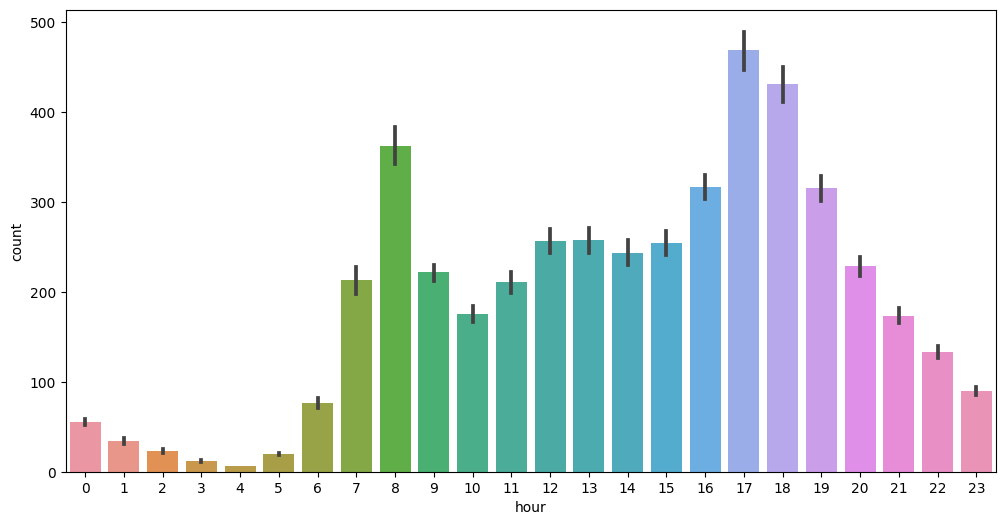

In [33]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'hour',
            y = 'count',
            data = DF)
plt.show()

* 'hour' vs. 'registered'

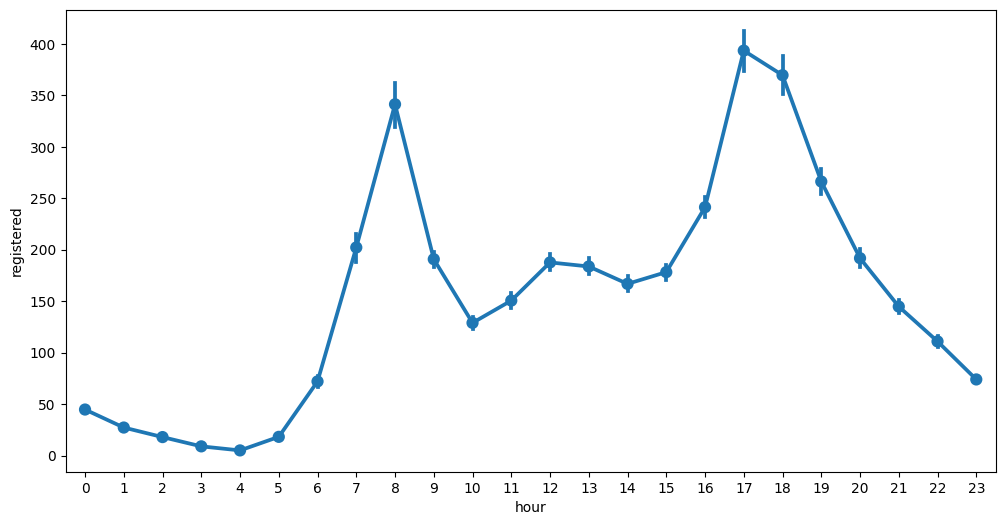

In [34]:
plt.figure(figsize = (12, 6))
sns.pointplot(x = 'hour',
              y = 'registered',
              data = DF)
plt.show()

* 'hour' vs. 'casual'

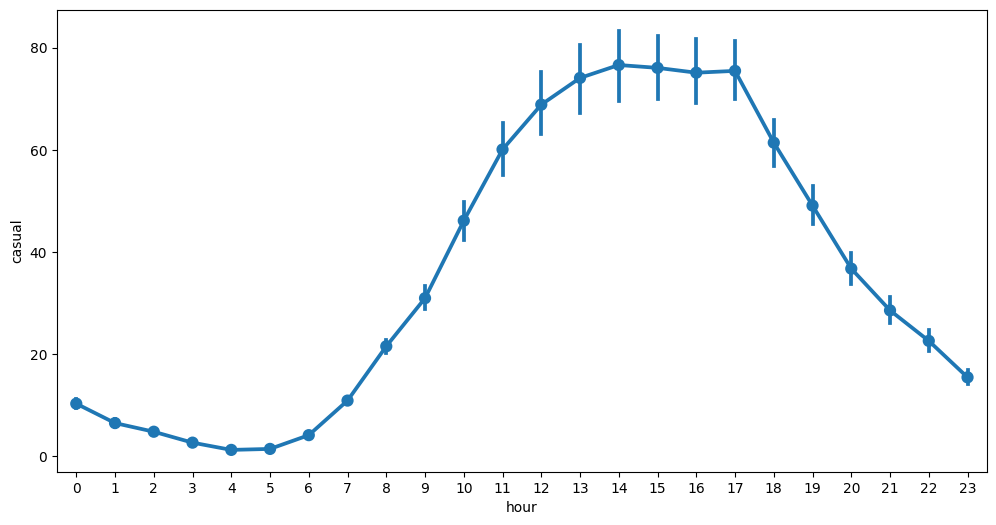

In [35]:
plt.figure(figsize = (12, 6))
sns.pointplot(x = 'hour',
              y = 'casual',
              data = DF)
plt.show()

> ## 8) 'weekday' - 요일별 평균 대여횟수

* 'weekday': 0(월요일) - 6(일요일)

* groupby( ) 적용

In [36]:
DF.groupby(['weekday'])['count'].mean()

weekday
Friday       197.844343
Monday       190.390716
Saturday     196.665404
Sunday       180.839772
Thursday     197.296201
Tuesday      189.723847
Wednesday    188.411348
Name: count, dtype: float64

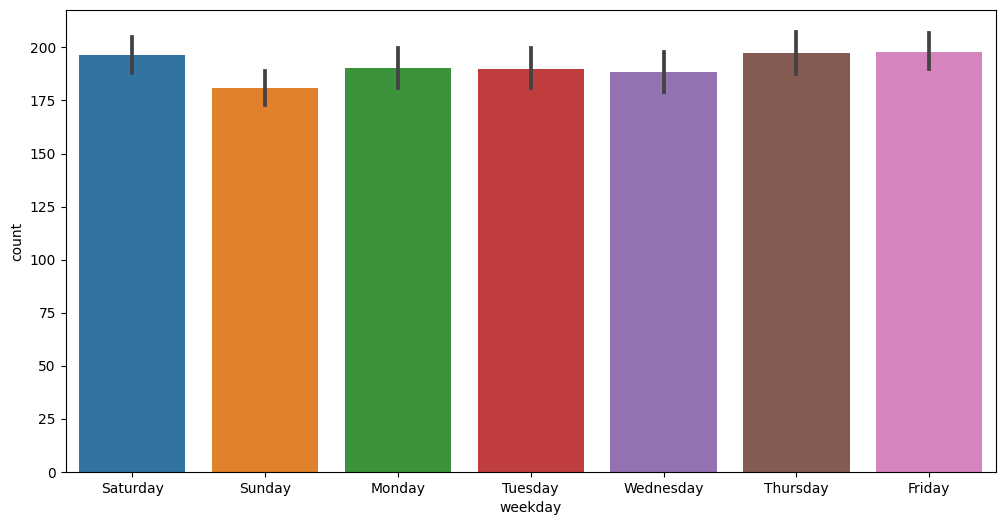

In [37]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'weekday',
            y = 'count',
            data = DF)
plt.show()

In [38]:
DF.groupby(['weekday'])['count'].sum()

weekday
Friday       302504
Monday       295296
Saturday     311518
Sunday       285546
Thursday     306401
Tuesday      291985
Wednesday    292226
Name: count, dtype: int64

> ## 9) 'holiday' and 'workingday'

* 'holiday': 1(토요일, 일요일을 제외한 공휴일), 0(휴일이 아닌 날)

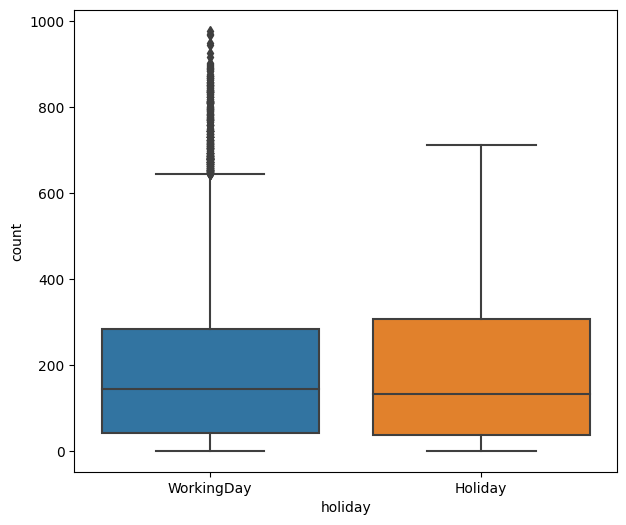

In [39]:
plt.figure(figsize = (7, 6))
sns.boxplot(x = 'holiday',
            y = 'count',
            data = DF)
plt.show()

'workingday': 1(토요일, 일요일 및 휴일이 아닌 주중), 0(주말 및 휴일)

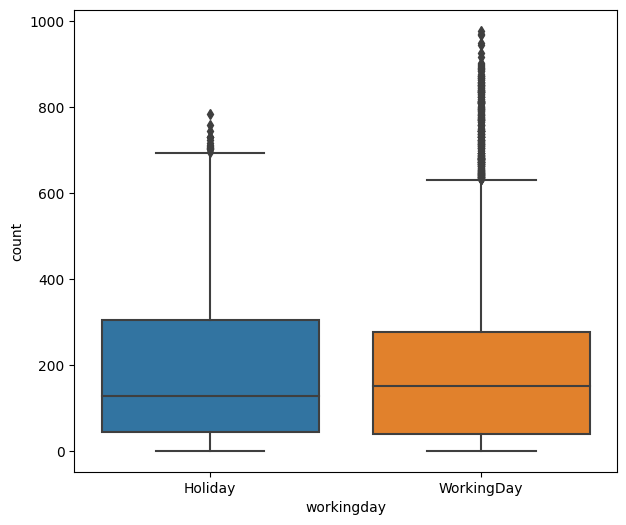

In [40]:
plt.figure(figsize = (7, 6))
sns.boxplot(x = 'workingday',
            y = 'count',
            data = DF)
plt.show()

> ## 10) 종합

* 막대 그래프

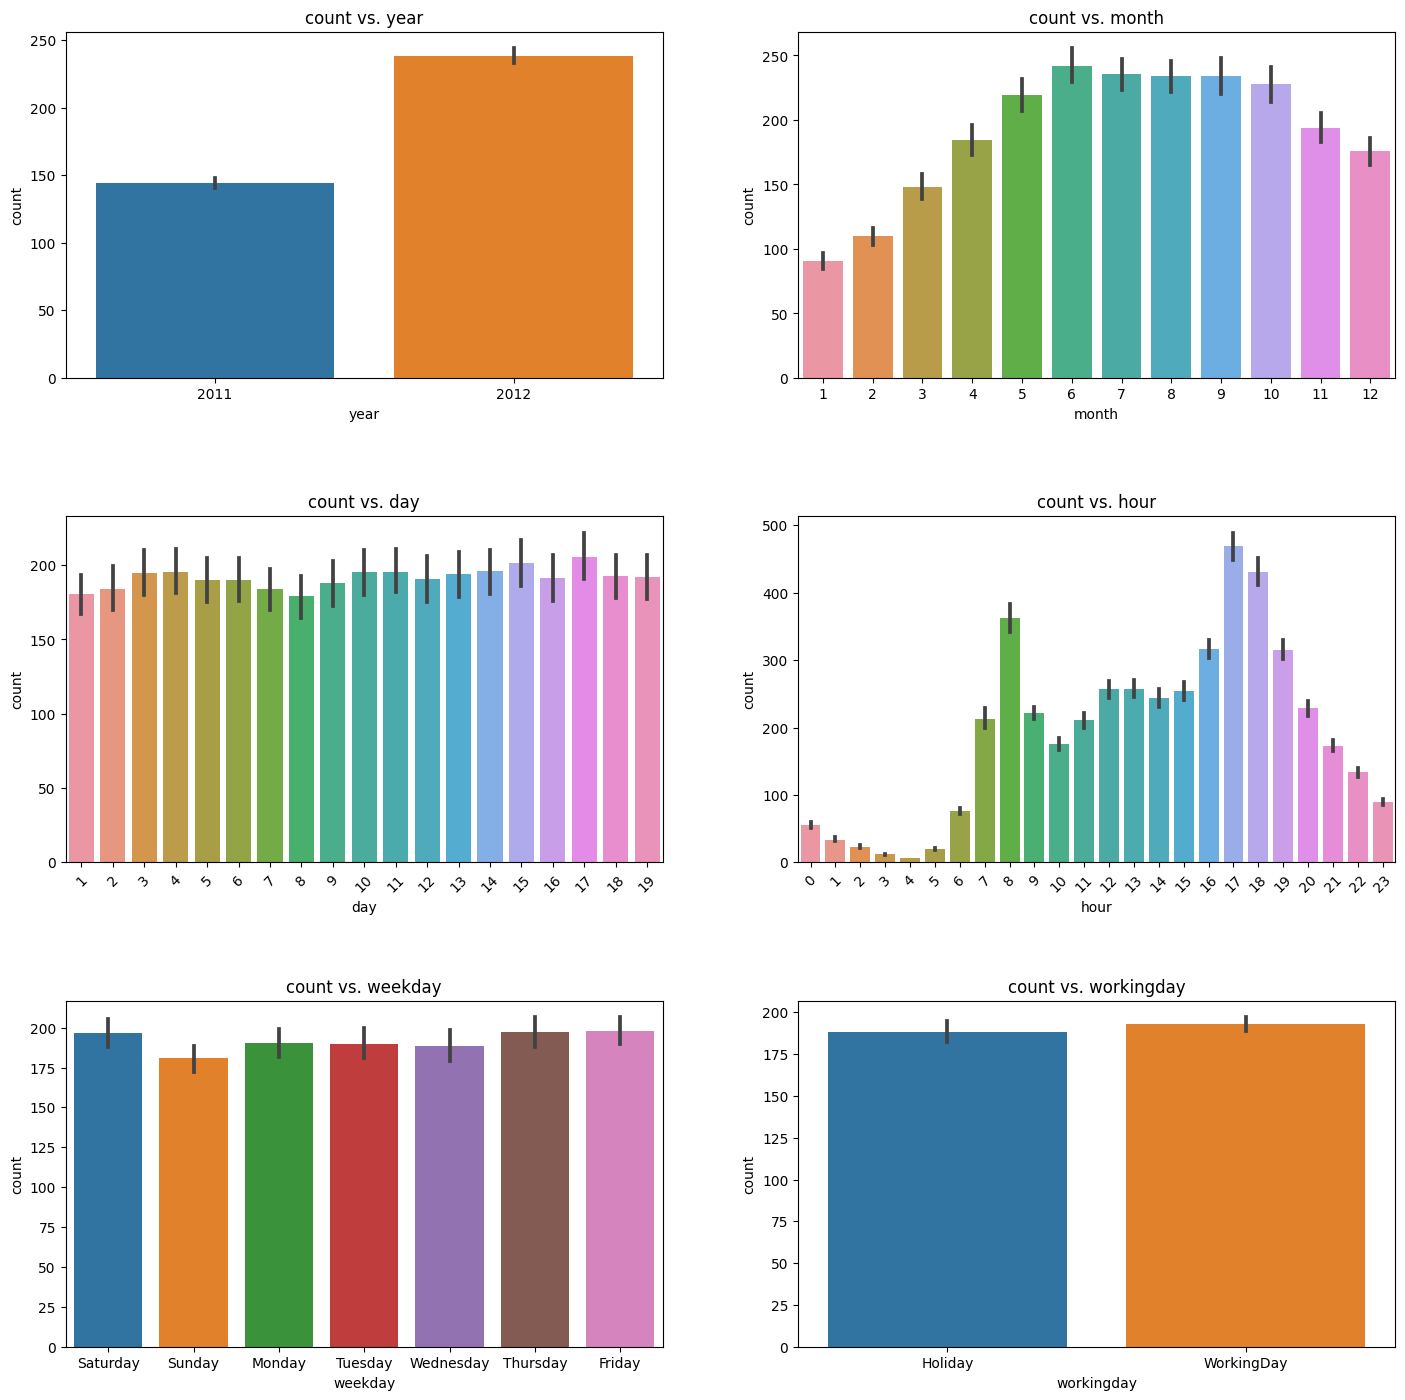

In [ ]:
figure, axes = plt.subplots(nrows = 3, ncols = 2)
plt.tight_layout()
figure.set_size_inches(15, 15)

sns.barplot(x = 'year', y = 'count', data = DF, ax = axes[0, 0])
sns.barplot(x = 'month', y = 'count', data = DF, ax = axes[0, 1])
sns.barplot(x = 'day', y = 'count', data = DF, ax = axes[1, 0])
sns.barplot(x = 'hour', y = 'count', data = DF, ax = axes[1, 1])
sns.barplot(x = 'weekday', y = 'count', data = DF, ax = axes[2, 0])
sns.barplot(x = 'workingday', y = 'count', data = DF, ax = axes[2, 1])

axes[0, 0].set(title = 'count vs. year')
axes[0, 1].set(title = 'count vs. month')
axes[1, 0].set(title = 'count vs. day')
axes[1, 1].set(title = 'count vs. hour')
axes[2, 0].set(title = 'count vs. weekday')
axes[2, 1].set(title = 'count vs. workingday')

axes[1, 0].tick_params(axis = 'x', labelrotation = 45)
axes[1, 1].tick_params(axis = 'x', labelrotation = 45)
plt.show()

* 상자 그래프

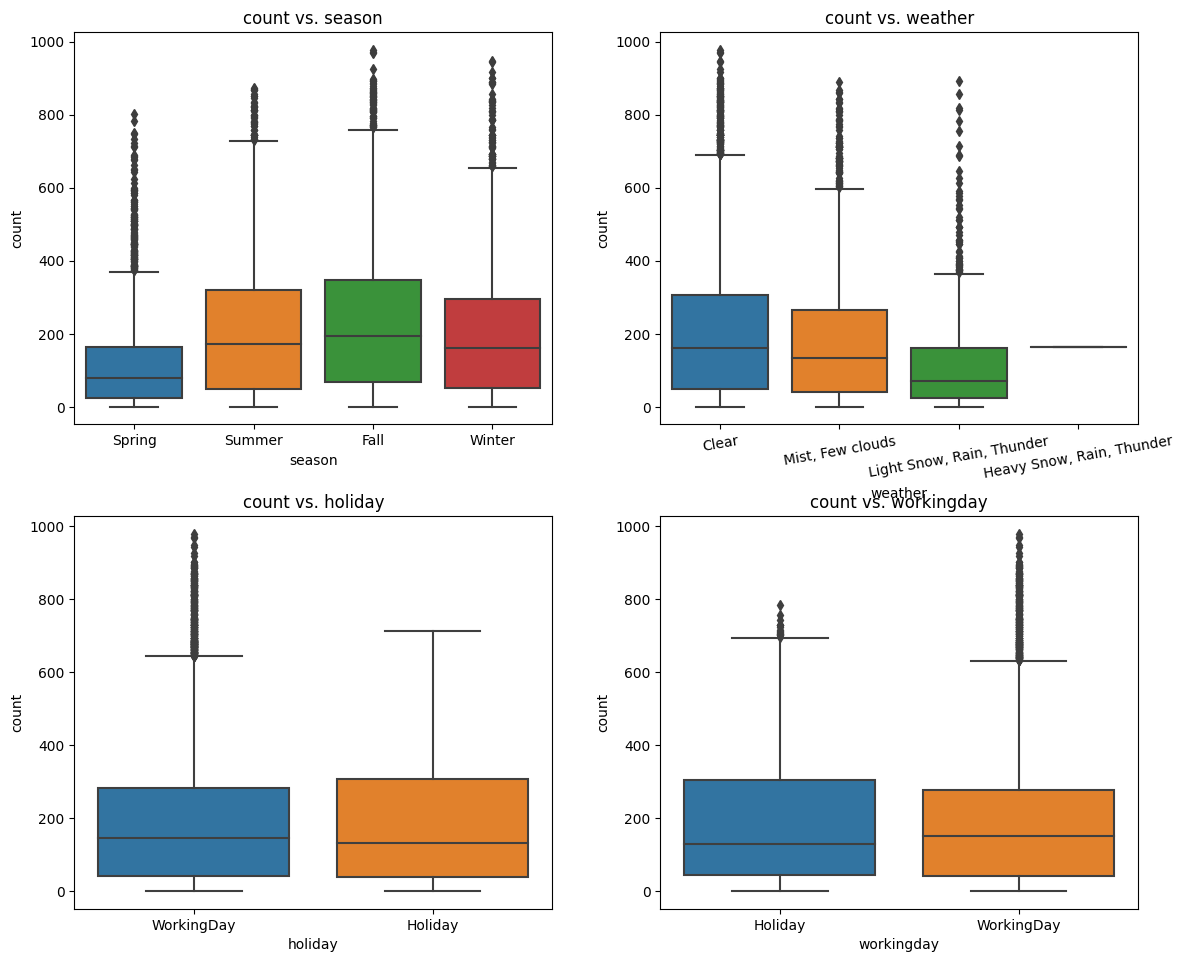

In [ ]:
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(12, 10)

sns.boxplot(x = 'season', y = 'count', data = DF, ax = axes[0, 0])
sns.boxplot(x = 'weather', y = 'count', data = DF, ax = axes[0, 1])
sns.boxplot(x = 'holiday', y = 'count', data = DF, ax = axes[1, 0])
sns.boxplot(x = 'workingday', y = 'count', data = DF, ax = axes[1, 1])

axes[0, 0].set(title='count vs. season')
axes[0, 1].set(title='count vs. weather')
axes[1, 0].set(title='count vs. holiday')
axes[1, 1].set(title='count vs. workingday')

axes[0, 1].tick_params(axis = 'x', labelrotation = 10)
plt.show()

* 선 그래프

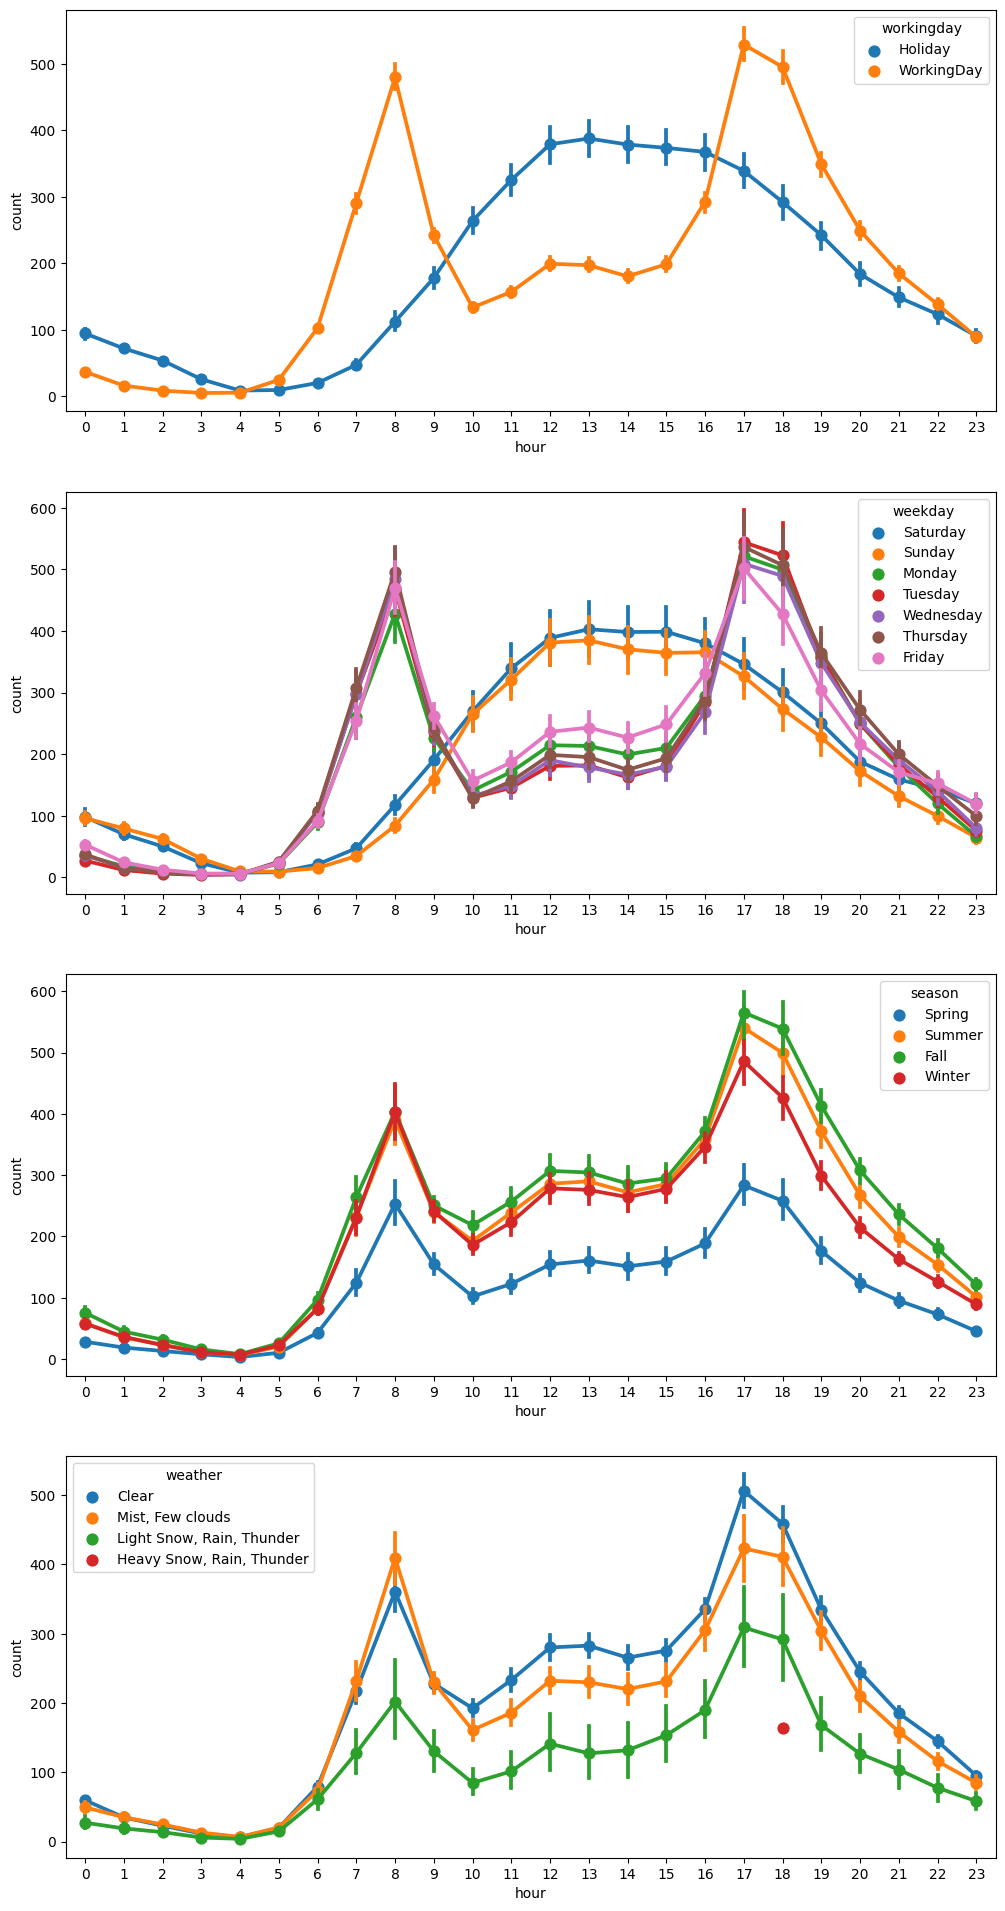

In [ ]:
figure, axes = plt.subplots(nrows = 4)
figure.set_size_inches(12, 24)

sns.pointplot(x = 'hour', y = 'count', data = DF, hue = 'workingday', ax = axes[0])
sns.pointplot(x = 'hour', y = 'count', data = DF, hue = 'weekday', ax = axes[1])
sns.pointplot(x = 'hour', y = 'count', data = DF, hue = 'season', ax = axes[2])
sns.pointplot(x = 'hour', y = 'count', data = DF, hue = 'weather', ax = axes[3])
plt.show()

* 산점도

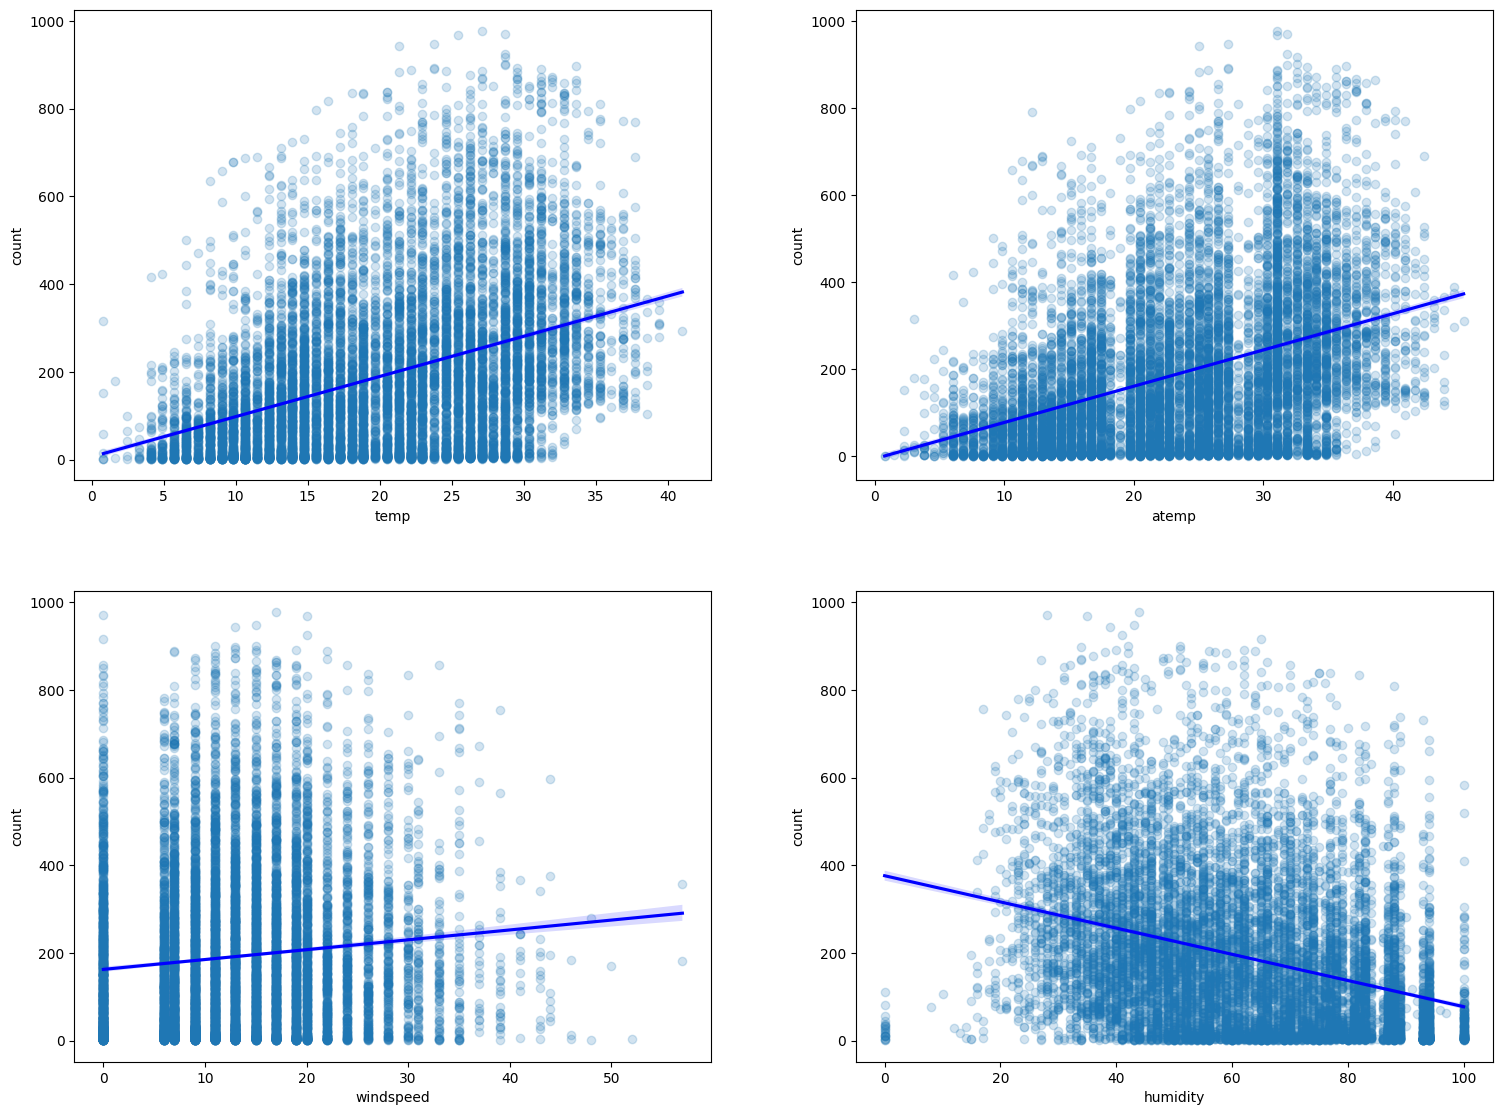

In [ ]:
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(16, 12)

sns.regplot(x = 'temp', y = 'count', data = DF, ax = axes[0, 0],
            scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(x = 'atemp', y = 'count', data = DF, ax = axes[0, 1],
            scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(x = 'windspeed', y = 'count', data = DF, ax = axes[1, 0],
            scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(x = 'humidity', y = 'count', data = DF, ax = axes[1, 1],
            scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
plt.show()

> ## 11) HeatMap - 연속형 데이터

* 연속형 데이터 상관계수('r')

In [ ]:
DF[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


* HeatMap Visualization

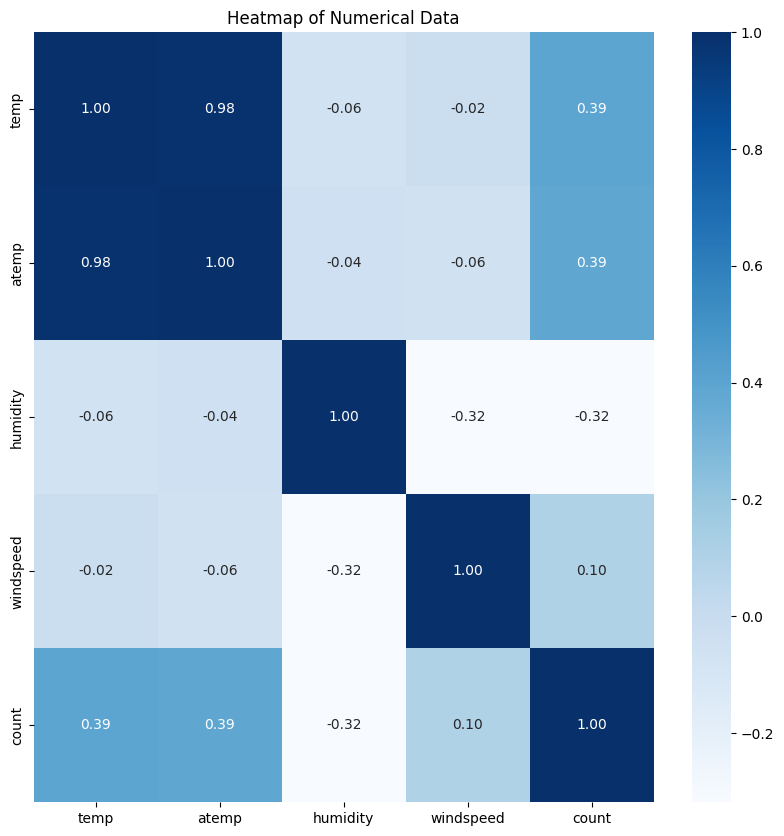

In [ ]:
heatMap = DF[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
fig, ax= plt.subplots()
fig.set_size_inches(10, 10)

sns.heatmap(heatMap,
            annot = True,
            cmap = 'Blues',
            fmt = '.2f')

ax.set(title='Heatmap of Numerical Data');

#
#
#
# End Of Document
#
#
#